In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy
import xarray
import dask
import hrlam
import matplotlib.pyplot as plt
import climtaslocal.nci

In [3]:
climtaslocal.nci.GadiClient()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:39747 Dashboard: /proxy/36889/status,Cluster Workers: 4 Cores: 4 Memory: 17.18 GB


In [4]:
mslp = hrlam.open_expt_var('spec', 'mslp', '400m')

In [5]:
from climtaslocal.regrid import regrid

In [6]:
mslp[-1,:,:]

<xarray.DataArray 'mslp' (latitude: 10554, longitude: 13194)>
dask.array<getitem, shape=(10554, 13194), dtype=float32, chunksize=(1000, 1000), chunktype=numpy.ndarray>
Coordinates:
    forecast_reference_time  datetime64[ns] 2017-03-26T12:00:00
  * longitude                (longitude) float64 109.5 109.5 ... 157.0 157.0
  * latitude                 (latitude) float32 -46.7972 -46.7936 ... -8.8064
    time                     datetime64[ns] 2017-03-28T23:00:00
    forecast_period          timedelta64[ns] dask.array<chunksize=(), meta=np.ndarray>
Attributes:
    standard_name:           air_pressure_at_sea_level
    units:                   Pa
    source:                  Data from Met Office Unified Model
    um_version:              11.4
    STASH:                   [  1  16 222]
    um_stash_source:         m01s16i222
    long_name:               PRESSURE AT MEAN SEA LEVEL
    stash_code:              16222
    wgdos_packing_accuracy:  2^0
    description:             Atmospheric pressure at mean sea level.

In [7]:
weights = xarray.open_dataset('/scratch/ly62/output/interp_weights/weights/weights_d0036t_to_barrat.nc')

In [16]:
mslp_regrid = regrid(mslp, weights=weights)

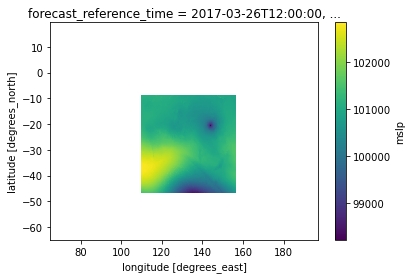

In [17]:
mslp_regrid[-1,:,:].plot.imshow()

In [10]:
mslp_barra = hrlam.open_expt_var('spec', 'mslp', 'BARRA_R')

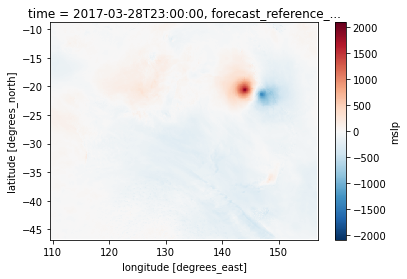

In [21]:
(mslp_barra - mslp_regrid).sel(time=mslp_regrid.time[-1], latitude=slice(mslp.latitude[0], mslp.latitude[-1]), longitude=slice(mslp.longitude[0], mslp.longitude[-1])).plot.imshow()

In [39]:
weights = xarray.open_dataset('/scratch/ly62/output/interp_weights/weights/weights_d0036t_to_barrat.nc')

def compare_barra(var):
    d0036 = hrlam.open_expt_var('spec', var, '400m')
    barra = hrlam.open_expt_var('spec', var, 'BARRA_R')
    regrd = regrid(d0036, weights=weights)
    
    diff = regrd - barra
    
    d0036 = d0036[-1,:,:]
    barra = barra.sel(time=d0036.time, latitude=slice(d0036.latitude[0], d0036.latitude[-1]), longitude=slice(d0036.longitude[0], d0036.longitude[-1]))
    diff = diff.sel(time=d0036.time, latitude=slice(d0036.latitude[0], d0036.latitude[-1]), longitude=slice(d0036.longitude[0], d0036.longitude[-1]))
    
    vmin = barra.min().values
    vmax = barra.max().values
    
    ax0 = plt.subplot(221)
    d0036.plot.imshow(ax=ax0, vmin=vmin, vmax=vmax)
    ax0.set_title('400m')
    ax1 = plt.subplot(222)
    barra.plot.imshow(ax=ax1, vmin=vmin, vmax=vmax)
    ax1.set_title('BARRA_R')
    ax2 = plt.subplot(223)
    diff.plot.imshow(ax=ax2)
    ax2.set_title('diff')
    

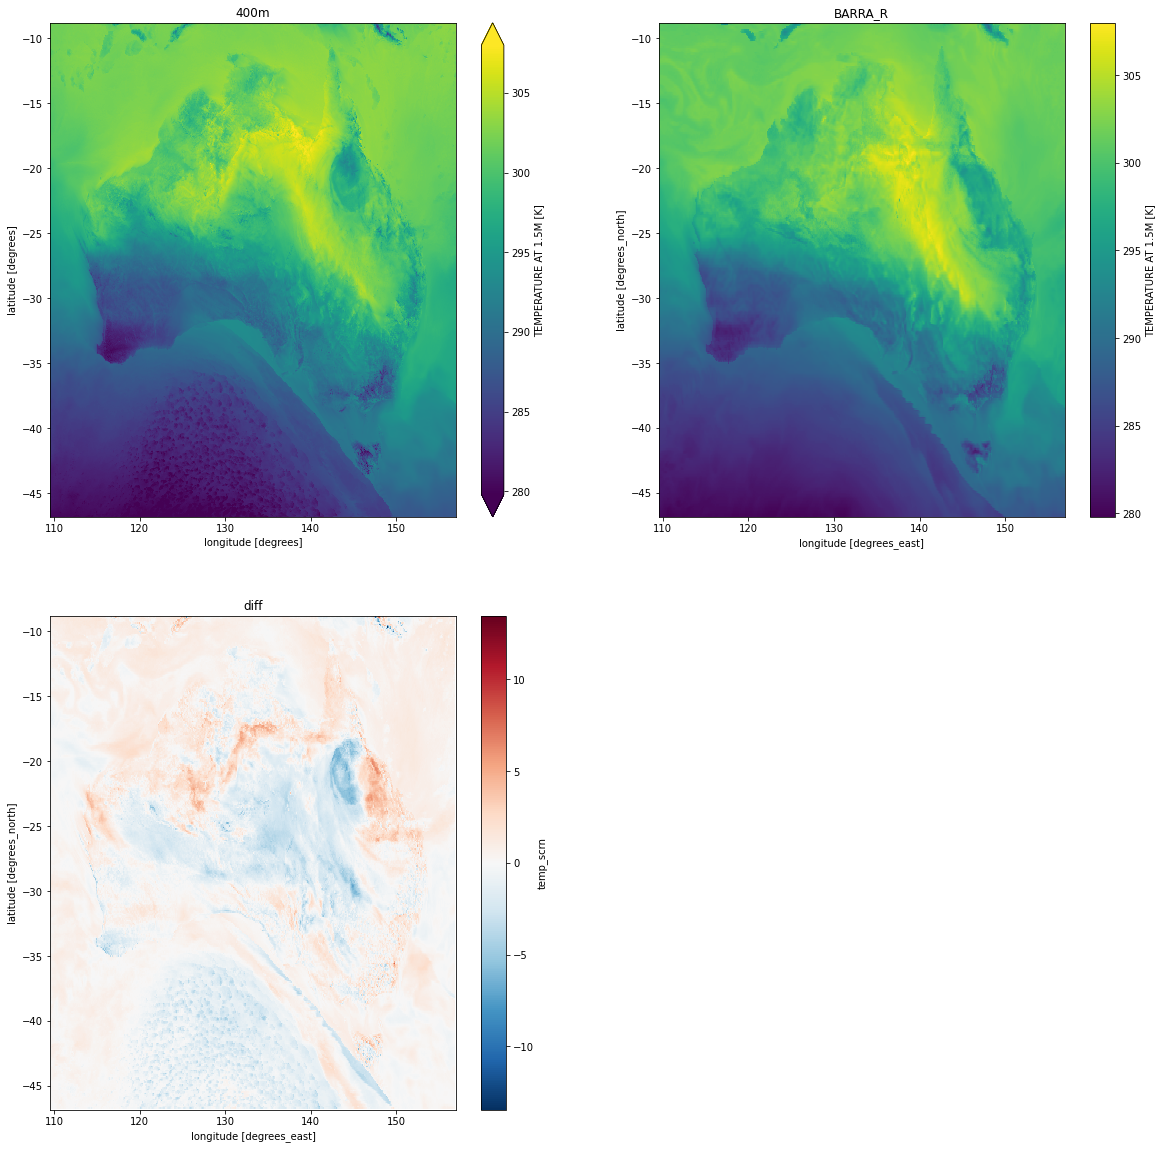

In [41]:
plt.figure(figsize=(20,20))
compare_barra('temp_scrn')
plt.savefig('compare_temp_scrn.png')